# Interpretable Machine Learning
by Christoph Molnar


A client wants you to predict data scientist salaries with machine learning.  


![](images/wow.jpg)


# Let's predict data scientist salaries

## What is Machine Learning

Machine learning is a method for teaching computers to make and improve predictions or behaviours based on data.

![](images/magic.jpg)


## Step 1: Find some data


Kaggle conducted an industry-wide survey of data scientists. 
https://www.kaggle.com/kaggle/kaggle-survey-2017

Information asked:  

- Compensation
- Demographics
- Job title
- Experience
- ...

<font size="2">Contains information from Kaggle ML and Data Science Survey, 2017, which is made available here under the Open Database License (ODbL).</font>


In [57]:
library('mlr')
library('ggplot2')
library('tidyr')
library('lime')
source('code/prepare-kaggle-data.R')
options(warn = 0)
set.seed(44)

Warning message in eval(ei, envir):
“NAs introduced by coercion”Warning message:
“Column `CompensationCurrency`/`originCountry` joining factors with different levels, coercing to character vector”

## Step 2: Throw ML on your data

In [42]:
library('mlr')
set.seed(42)
task = makeRegrTask(data = survey.dat, target = 'CompensationAmount')
lrn = makeLearner('regr.randomForest', ntree = 500)
mod = train(lrn, task)

## Step 3: Profit

![](images/done-here.gif)


Client: "There is a problem with the model!"

## What problem?

![](images/Hide-the-pain-harold-phone.jpg)

## "The older the applicants, the higher the predicted salary, regardless of skills."
![](images/age.jpeg)

# Partial Dependence Plots


In [83]:
library("iml")
X = survey.dat[-which(names(survey.dat) == "CompensationAmount")]
predictor = Predictor$new(mod, data = X, y = getTaskTargets(task))
pd = Partial$new(predictor, feature ='Age')

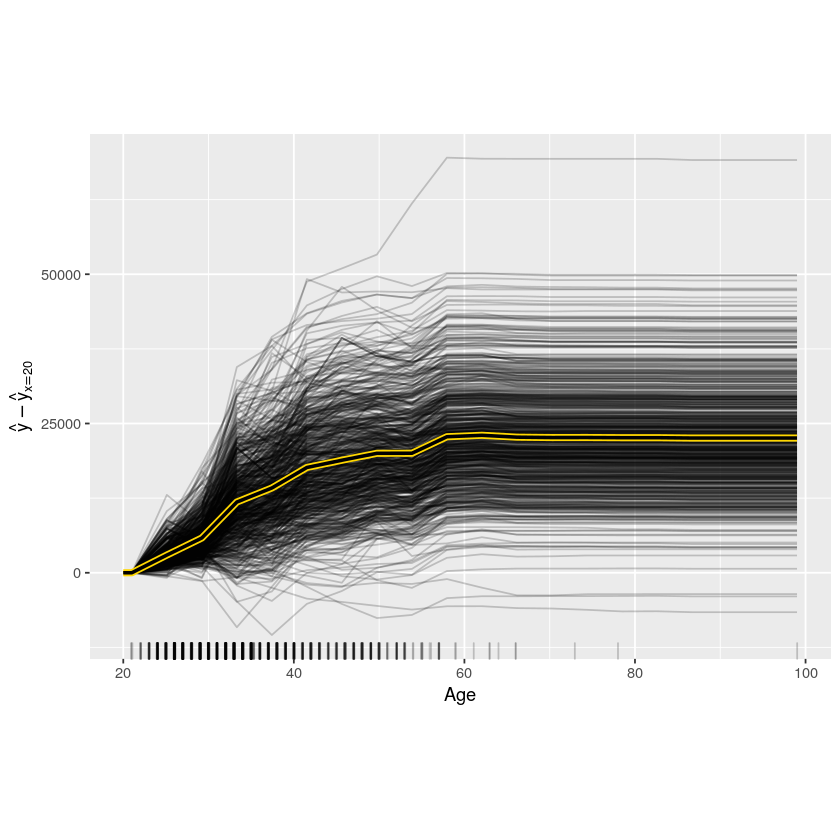

In [96]:
pd$plot() + coord_fixed(ratio = 0.0007)

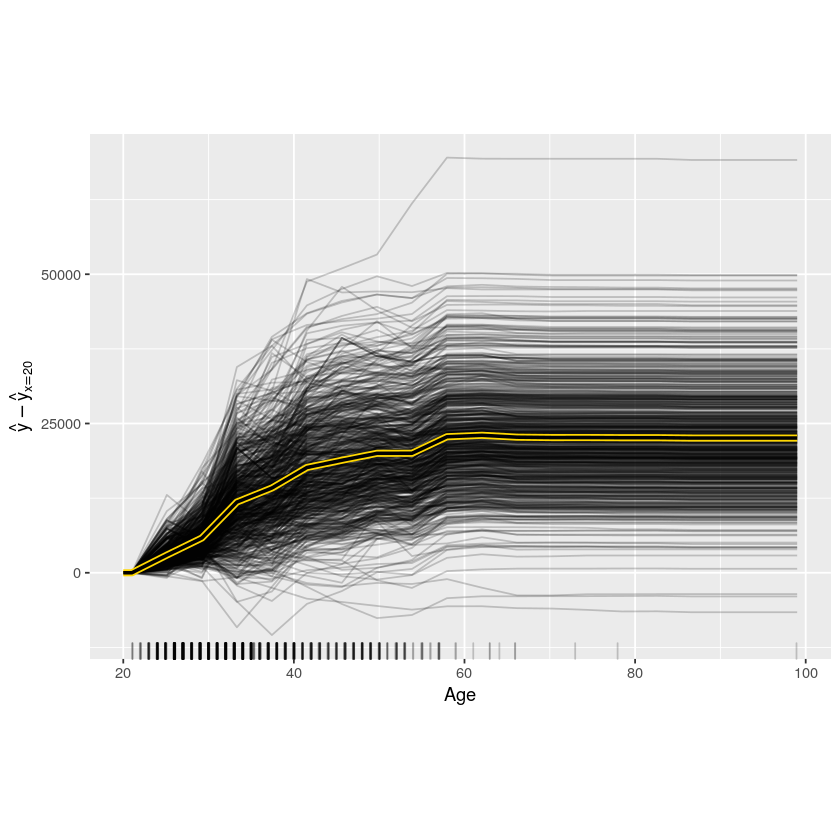

In [97]:
pd$center(20)
pd$plot() + coord_fixed(ratio = 0.0007)

Client: "We want to understand the model better!"

# Permutation feature importance

Warning message in predict.WrappedModel(model, newdata = newdata):
“Provided data for prediction is not a pure data.frame but from class data.table, hence it will be converted.”

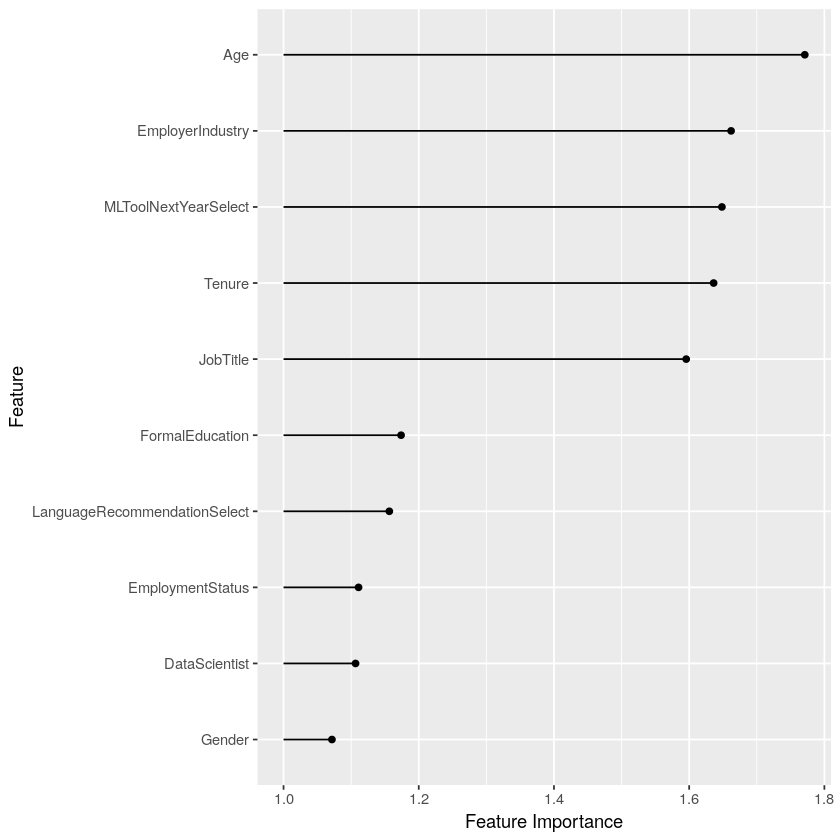

In [98]:
feat.imp = FeatureImp$new(predictor, loss = 'mae')
feat.imp$plot()

# Gender?!
![](images/big-mistake.png)

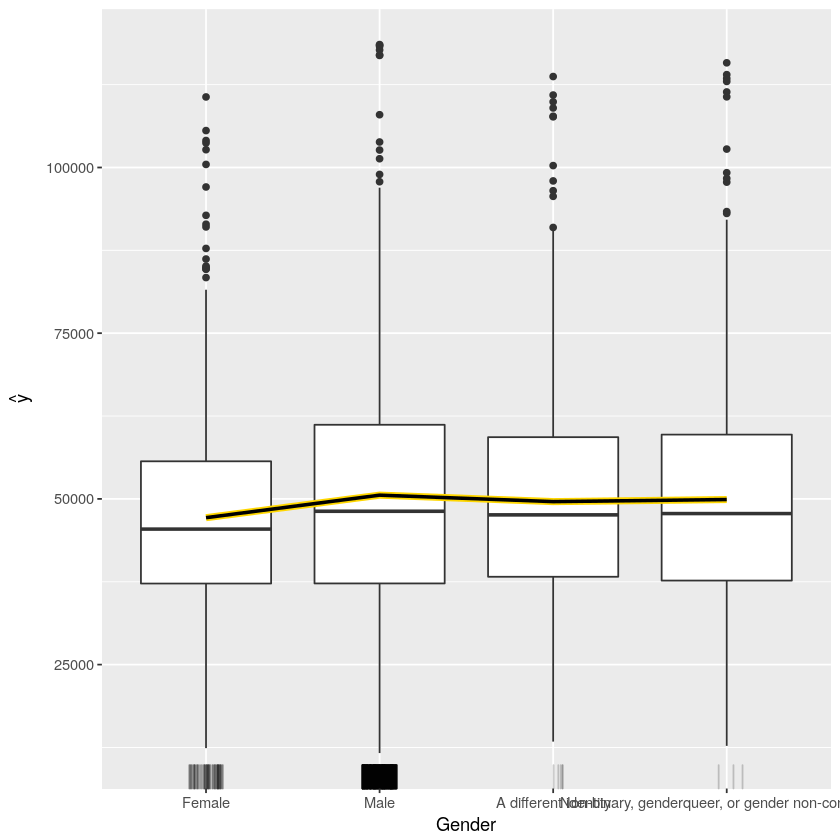

In [99]:
pdp = Partial$new(predictor, feature="Gender", ice = TRUE, aggregation = "pdp")
pdp$plot() 

In [100]:
pdp$results[pdp$results$.type == "pdp", c("Gender", ".y.hat")]

Gender,.y.hat
Male,50564.82
Female,47168.67
"Non-binary, genderqueer, or gender non-conforming",49904.63
A different identity,49589.76


![](images/hidden-pain-bias.jpg)

![](images/angry.gif)


# Local Surrogate Models


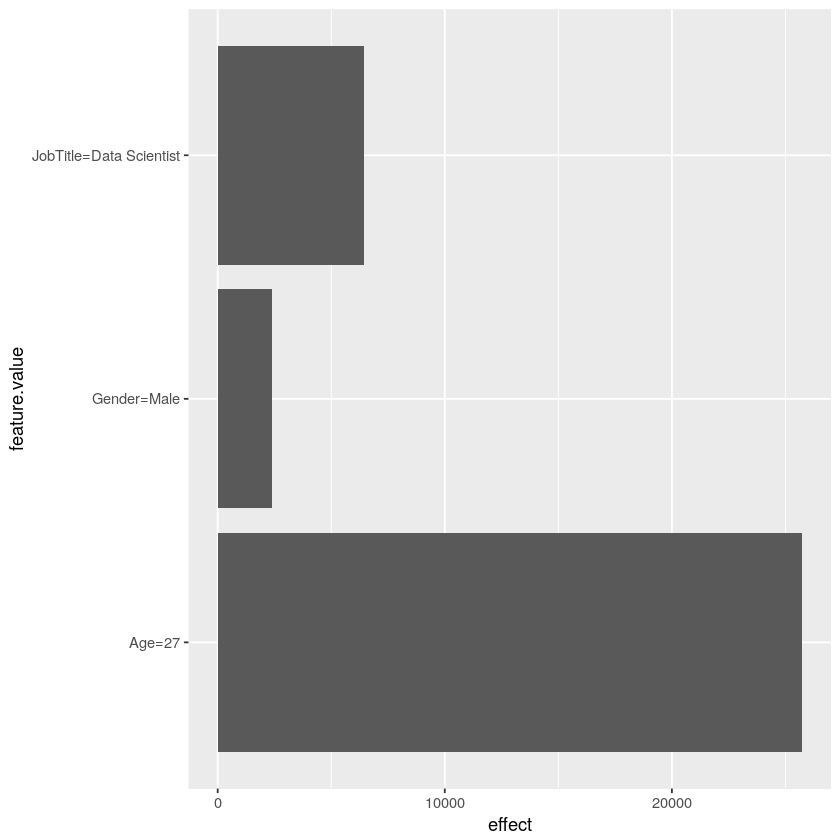

In [101]:
explanation = LocalModel$new(predictor)
explanation$explain(X[15, ])
explanation$plot()

# Shapley

Warning message in predict.WrappedModel(model, newdata = newdata):
“Provided data for prediction is not a pure data.frame but from class data.table, hence it will be converted.”

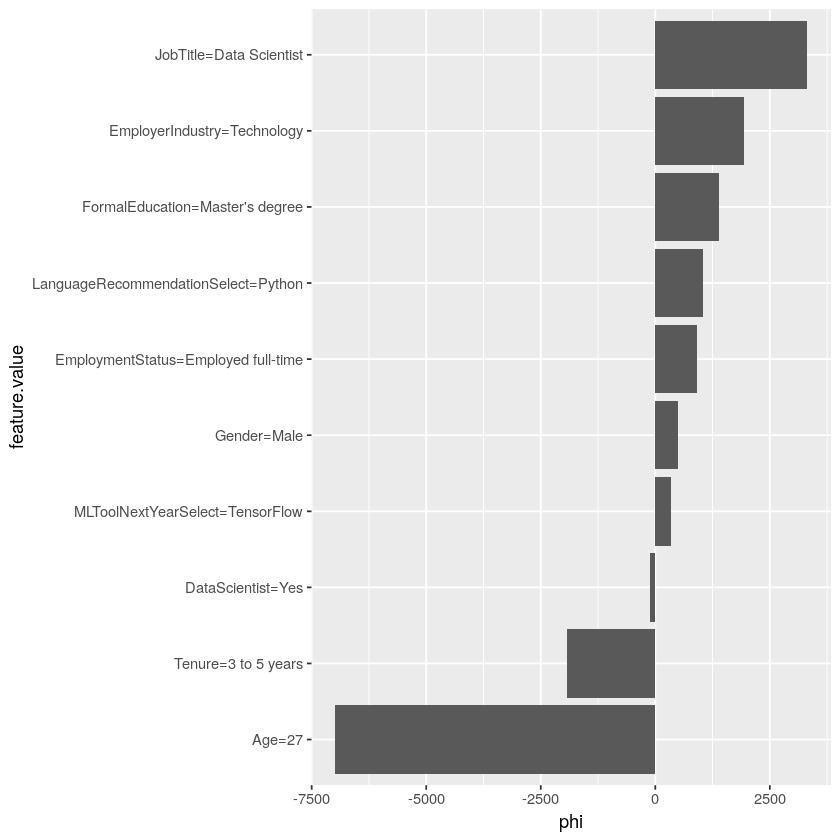

In [102]:
explanation = Shapley$new(predictor)
explanation$explain(X[15, ])
explanation$plot()

# Some Theory

## What is interpretability?

## When do we need interpretability?

## When don't we need interpretability?

## What tools do we have?

## Some criteria


## Interested in learning more?

Read my book about "Interpretable Machine Learning"
https://christophm.github.io/interpretable-ml-book/

![](images/book.jpg)

# References

<font size="2">Goldstein, A., Kapelner, A., Bleich, J., & Pitkin, E. (2013). Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation, 1–22. https://doi.org/10.1080/10618600.2014.907095 </font>

<font size="2">Friedman, J. H. (1999). Greedy Function Approximation : A Gradient Boosting Machine. North, 1(3), 1–10. https://doi.org/10.2307/2699986 </font>

<font size="2">Ribeiro, M. T., Singh, S., & Guestrin, C. (2016). “Why Should I Trust You?”: Explaining the Predictions of Any Classifier. Retrieved from http://arxiv.org/abs/1602.04938</font>

<font size="2">Breiman, Leo. "Random forests." Machine learning 45.1 (2001): 5-32. </font>
